# Single-layer Perceptron

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fblog.josemarianoalvarez.com%2Fwp-content%2Fuploads%2F2018%2F06%2FModeloPerceptron.jpeg&f=1&nofb=1&ipt=70acefd9ffd7b80356c3c7cd7b1eb0de7baeacc107199095a8fffd00df2f157a" width="800">

In [328]:
# @title Dependencies

!pip install torch
!pip install torchvision

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [329]:
# @title Dataset

# NOTE(abi): since we're working with logic gates we'll create some dummy data.
# Input features (2 features per sample)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# Output labels
# TODO(abi): play around with different truth tables. Hint: XOR will fail!
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [330]:
# @title Network architecture

# NOTE(abi): this is the simplest neural network one could possible make, i.e., a single neuron.
class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size: int = 2) -> None:
        super().__init__()
        self.hidden = nn.Linear(input_size, input_size)
        self.output = nn.Linear(input_size, 1)

    # NOTE(abi): the `unit step` function is not differentiable, so we would have to disable autograding. Instead, we'll use
    #            the sigmoid function.
    def forward(self, x) -> torch.Tensor:
        # Hidden layer + non-linear activation function (sigmoid, ReLU, etc.)
        # x = torch.sigmoid(self.hidden(x))

        # Output layer (sigmoid for binary probability distribution)
        return torch.sigmoid(self.output(x))

In [331]:
# @title Model initialization

# Initialize the model
model = SingleLayerPerceptron()

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

Epoch [200 / 5000], Loss: 0.3408
Epoch [400 / 5000], Loss: 0.2486
Epoch [600 / 5000], Loss: 0.1973
Epoch [800 / 5000], Loss: 0.1639
Epoch [1000 / 5000], Loss: 0.1401
Epoch [1200 / 5000], Loss: 0.1222
Epoch [1400 / 5000], Loss: 0.1083
Epoch [1600 / 5000], Loss: 0.0972
Epoch [1800 / 5000], Loss: 0.0881
Epoch [2000 / 5000], Loss: 0.0805
Epoch [2200 / 5000], Loss: 0.0741
Epoch [2400 / 5000], Loss: 0.0686
Epoch [2600 / 5000], Loss: 0.0638
Epoch [2800 / 5000], Loss: 0.0596
Epoch [3000 / 5000], Loss: 0.0560
Epoch [3200 / 5000], Loss: 0.0527
Epoch [3400 / 5000], Loss: 0.0498
Epoch [3600 / 5000], Loss: 0.0472
Epoch [3800 / 5000], Loss: 0.0449
Epoch [4000 / 5000], Loss: 0.0427
Epoch [4200 / 5000], Loss: 0.0408
Epoch [4400 / 5000], Loss: 0.0390
Epoch [4600 / 5000], Loss: 0.0374
Epoch [4800 / 5000], Loss: 0.0359
Epoch [5000 / 5000], Loss: 0.0345


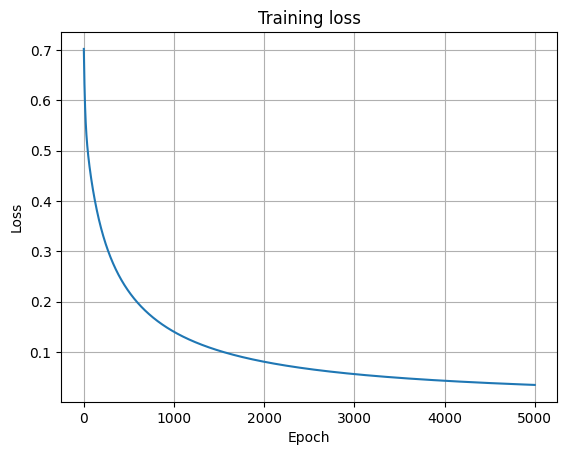

In [332]:
# @title Training

epochs = 5000
losses = []
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch + 1} / {epochs}], Loss: {loss.item():.4f}')

# Plot training loss over time
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.grid(True)
plt.show()

In [333]:
# @title Evaluation

with torch.no_grad():
    probs = model(X)
    predicted = (probs > 0.5).float()
    accuracy = (predicted == y).float().mean()
    print(f"Predicted: {predicted.flatten()}")
    print(f"Actual: {y.flatten()}")
    print(f"Accuracy: {accuracy.item()*100:.2f}%")

Predicted: tensor([0., 0., 0., 1.])
Actual: tensor([0., 0., 0., 1.])
Accuracy: 100.00%
